<a href="https://colab.research.google.com/drive/11ICtbBbRXPvDeAZxWTXEO_mp0uz9Sp4y?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de previsão de ações

#### Esse trabalho tem como intuito fazer um modelo preditivo do preço de determinadas ações que eu acompanho.

Foram escolhidas ações das seguintes empresas:



*   Magalu (MGLU3)
*   Banco do Brasil (BBAS3)
*   Embraer (EMBR3)
*   Itaú (ITUB4)
*   Americanas (AMER3)

A ideia é fazer uma análise exploratória utilizando a biblioteca Plotly, afim de simular um gráfico típico de plataformas de investimentos, o modelo de **candlesticks**

Os dados foram importados com uma biblioteca que se conecta à API do Yahoo, chamada **Yahoo Finance**

A base de dados tem uma indexação por datas, facilitando bastante o processo de geração de gráficos, e possui as seguintes colunas:



*   Open - Preço de abertura
*   High - Maior valor alcançado na data
*   Low - Menor valor alcançado na data
*   Close - Valor de fechamento da ação
*   Adj Close - Fechamento ajustado, após distribuição de dividendos e outras operações
*   Volume - Quantas ações foram negociadas (Tanto compras quanto vendas)




## 1 - Importando pacotes necessários

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# importando pacotes
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio

yfin.pdr_override()

## 2- Carregando dados através da API do Yahoo

In [ ]:
# data inicial em 2016

start = dt.datetime(2017,1,1)
# data final no dia da execução
end = dt.datetime.now()

# escolher a ação desejada
acoes = ['MGLU3.SA','ITUB4.SA', 'EMBR3.SA','AMER3.SA', 'BBAS3.SA']

stocks = pdr.get_data_yahoo(acoes, start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [ ]:
#Visualizando fechamentos

stocks_close = pd.DataFrame(stocks['Close'])
stocks_close

,AMER3.SA,BBAS3.SA,EMBR3.SA,ITUB4.SA,MGLU3.SA
Date,,,,,
2017-01-02,9.846182,27.540001,16.000000,22.353333,0.397304
2017-01-03,10.097163,28.799999,16.360001,23.299999,0.396093
2017-01-04,10.328838,28.650000,16.170000,23.400000,0.375000
2017-01-05,10.637737,28.580000,16.500000,23.719999,0.387890
2017-01-06,10.309531,28.889999,16.580000,23.799999,0.385390
...,...,...,...,...,...
2023-03-31,1.000000,39.110001,20.790001,24.740000,3.310000
2023-04-03,1.010000,38.650002,20.660000,24.030001,3.310000
2023-04-04,1.000000,39.290001,20.809999,24.510000,3.220000


In [ ]:
stocks.head()

Adj Close                                                 Close  \
             AMER3.SA   BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA   AMER3.SA   
Date                                                                          
2017-01-02   9.652307  19.448143  15.616085  17.197514  0.379203   9.846182   
2017-01-03   9.898346  20.337927  15.967447  17.925833  0.378047  10.097163   
2017-01-04  10.125460  20.232006  15.782008  18.002768  0.357915  10.328838   
2017-01-05  10.428276  20.182568  16.104092  18.248953  0.370218  10.637737   
2017-01-06  10.106532  20.401493  16.182169  18.310493  0.367832  10.309531   

                                                       ...       Open  \
             BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA  ...   AMER3.SA   
Date                                                   ...              
2017-01-02  27.540001  16.000000  22.353333  0.397304  ...   9.846182   
2017-01-03  28.799999  16.360001  23.299999  0.396093  ...   9.855835   
2017-01-04  28.650000  16.170000  23.400000  0.375000  ...  10.106816   
2017-01-05  28.580000  16.500000  23.719999  0.387890  ...  10.377103   
2017-01-06  28.889999  16.580000  23.799999  0.385390  ...  10.570166   

                                                        Volume           \
             BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA AMER3.SA BBAS3.SA   
Date                                                                      
2017-01-02  27.900000  15.900000  22.299999  0.410273   203146  1968200   
2017-01-03  27.760000  16.000000  22.559999  0.400351   802745  7578900   
2017-01-04  28.650000  16.200001  23.200001  0.394531   642797  4156300   
2017-01-05  28.719999  16.180000  23.393333  0.376796  1745031  5457100   
2017-01-06  28.580000  16.500000  23.693333  0.387890   644869  3692400   

                                         
           EMBR3.SA  ITUB4.SA  MGLU3.SA  
Date                                     
2017-01-02   563200   3105150  16025600  
2017-01-03  2032500  25215000  12825600  
2017-01-04  1351000  13619250  27468800  
2017-01-05  1358500  21988800  27622400  
2017-01-06  1040200  14017650   6400000  

[5 rows x 30 columns]

Como são dados tirados de API, a limpeza é mais simples, e para as empresas escolhidas, não houveram valores nulos:

In [ ]:
#Checando nulos

stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2017-01-02 to 2023-04-06
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AMER3.SA)  1560 non-null   float64
 1   (Adj Close, BBAS3.SA)  1560 non-null   float64
 2   (Adj Close, EMBR3.SA)  1560 non-null   float64
 3   (Adj Close, ITUB4.SA)  1560 non-null   float64
 4   (Adj Close, MGLU3.SA)  1560 non-null   float64
 5   (Close, AMER3.SA)      1560 non-null   float64
 6   (Close, BBAS3.SA)      1560 non-null   float64
 7   (Close, EMBR3.SA)      1560 non-null   float64
 8   (Close, ITUB4.SA)      1560 non-null   float64
 9   (Close, MGLU3.SA)      1560 non-null   float64
 10  (High, AMER3.SA)       1560 non-null   float64
 11  (High, BBAS3.SA)       1560 non-null   float64
 12  (High, EMBR3.SA)       1560 non-null   float64
 13  (High, ITUB4.SA)       1560 non-null   float64
 14  (High, MGLU3.SA)       1560 non-null  

## 3. Visualizando dados da Americanas

In [ ]:
# Separando os dados das Americanas em um dataset diferente

stocks_amer3 = pdr.get_data_yahoo('AMER3.SA', start=start, end=end)
stocks_amer3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,9.846182,9.962019,9.711038,9.846182,9.652307,203146
2017-01-03,9.855835,10.232306,9.826875,10.097163,9.898346,802745
2017-01-04,10.106816,10.377103,10.068203,10.328838,10.125460,642797
2017-01-05,10.377103,10.840453,10.309531,10.637737,10.428276,1745031
2017-01-06,10.570166,10.570166,10.068203,10.309531,10.106532,644869
...,...,...,...,...,...,...
2023-03-31,1.000000,1.010000,0.970000,1.000000,1.000000,24347600
2023-04-03,1.010000,1.020000,0.980000,1.010000,1.010000,29668500
2023-04-04,1.010000,1.040000,0.990000,1.000000,1.000000,37321700


In [ ]:
stocks_amer3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03
mean,39.466067,40.437562,38.425265,39.397965,38.679730,8.819036e+06
std,27.653127,28.246636,26.986078,27.583667,27.003610,2.226279e+07
min,0.800000,0.870000,0.640000,0.710000,0.710000,0.000000e+00
25%,18.364728,18.681021,17.850753,18.273299,17.998275,1.881524e+06
50%,31.520000,32.400204,30.556767,31.436501,30.938710,3.230385e+06
75%,55.080001,56.147501,54.137899,55.345000,54.255237,6.283800e+06
max,125.650002,127.469025,121.250000,126.000000,123.519012,2.926335e+08


*   No período analisado, a maior alta de fechamento das Americanas foi de 126 reais
*   O menor valor registrado foi de 0,71 centavos



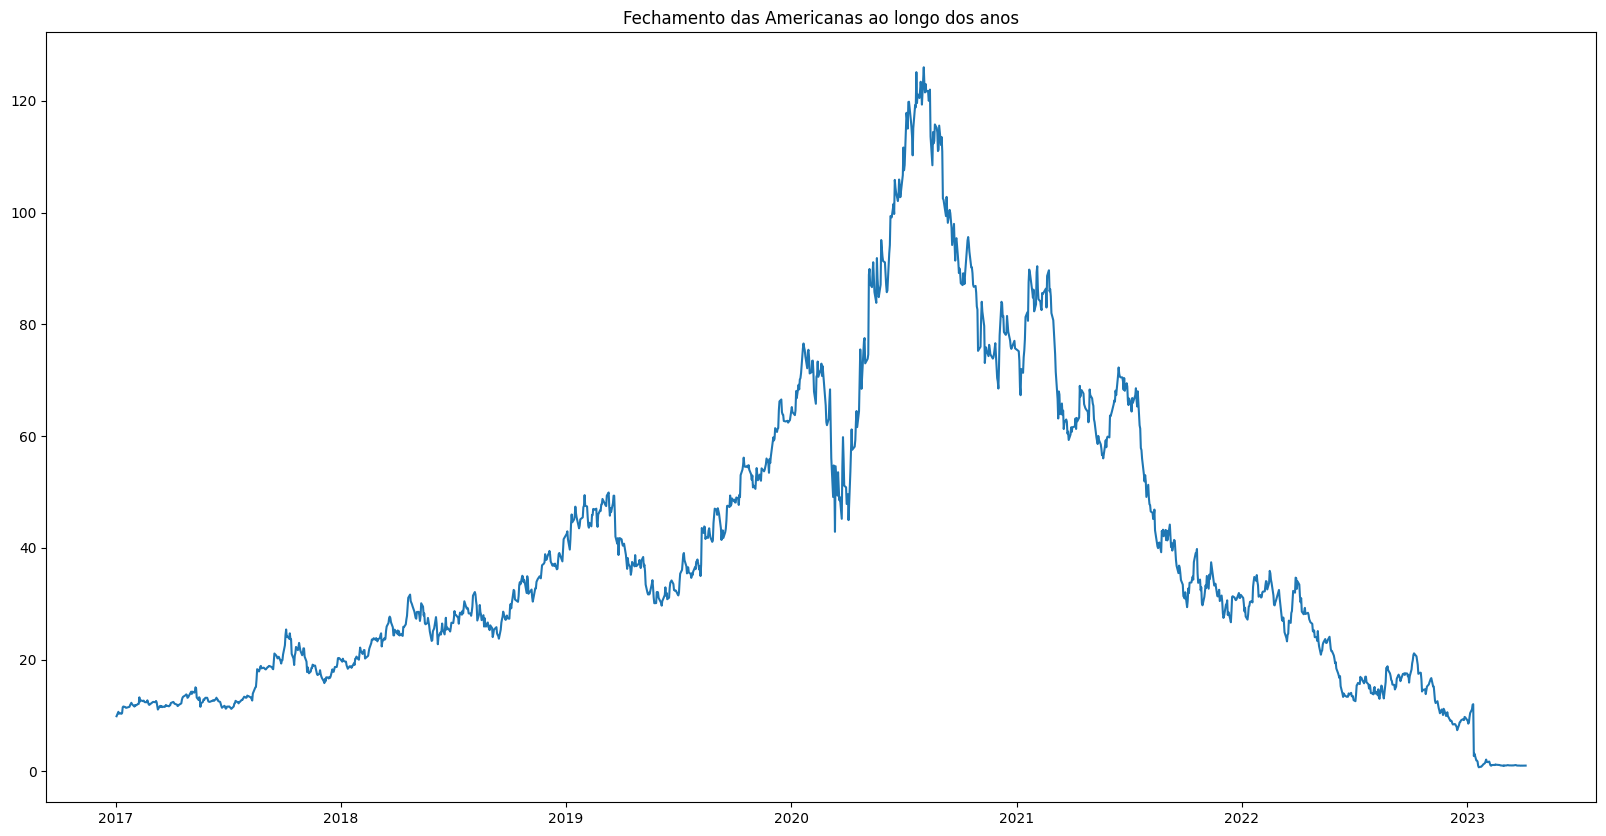

In [ ]:
#Criando um gráfico provisório para a análise de fechamento de preços

plt.figure(figsize=(20, 10))
plt.plot(stocks_amer3['Close'])
plt.title('Fechamento das Americanas ao longo dos anos')
plt.show()

### Análise de outliers

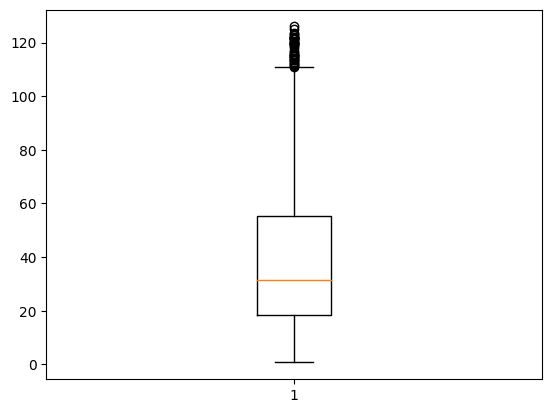

In [ ]:
# Criando o gráfico de boxplot na variável Close

bplots = plt.boxplot(stocks_amer3['Close'],  vert = 1, patch_artist = False)

In [ ]:
# Visualizando os outliers

def get_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = get_outliers(stocks_amer3['Close'])
print('Número de outliers: '+ str(len(outliers)))
print('Maior outlier: '+ str(outliers.max()))
print('Menor outlier: '+ str(outliers.min()))
print('')
outliers

Número de outliers: 27
Maior outlier: 126.0
Menor outlier: 115.3001708984375



Date
2020-07-06 00:00:00-03:00    117.851540
2020-07-07 00:00:00-03:00    116.705421
2020-07-09 00:00:00-03:00    119.775040
2020-07-10 00:00:00-03:00    119.834839
2020-07-13 00:00:00-03:00    116.605759
2020-07-14 00:00:00-03:00    115.300171
2020-07-20 00:00:00-03:00    119.236862
2020-07-21 00:00:00-03:00    118.828239
2020-07-22 00:00:00-03:00    125.126945
2020-07-23 00:00:00-03:00    119.595650
2020-07-24 00:00:00-03:00    121.180290
2020-07-27 00:00:00-03:00    120.500000
2020-07-28 00:00:00-03:00    121.830002
2020-07-29 00:00:00-03:00    123.410004
2020-07-30 00:00:00-03:00    122.000000
2020-07-31 00:00:00-03:00    119.320000
2020-08-03 00:00:00-03:00    126.000000
2020-08-04 00:00:00-03:00    122.989998
2020-08-05 00:00:00-03:00    121.500000
2020-08-06 00:00:00-03:00    123.010002
2020-08-07 00:00:00-03:00    121.669998
2020-08-10 00:00:00-03:00    121.779999
2020-08-11 00:00:00-03:00    120.000000
2020-08-12 00:00:00-03:00    120.260002
2020-08-13 00:00:00-03:00    122.00

In [ ]:
# Deletando os outliers

def drop_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna(subset=['Close'])
   return outliers_dropped

amer3_clean = drop_outliers(stocks_amer3)
amer3_clean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02 00:00:00-02:00,9.846182,9.962019,9.711038,9.846182,9.652307,203146.0
2017-01-03 00:00:00-02:00,9.855835,10.232306,9.826875,10.097163,9.898346,802745.0
2017-01-04 00:00:00-02:00,10.106816,10.377103,10.068203,10.328838,10.125460,642797.0
2017-01-05 00:00:00-02:00,10.377103,10.840453,10.309531,10.637737,10.428276,1745031.0
2017-01-06 00:00:00-02:00,10.570166,10.570166,10.068203,10.309531,10.106532,644869.0
...,...,...,...,...,...,...
2023-01-23 00:00:00-03:00,0.850000,0.880000,0.740000,0.800000,0.800000,NaN
2023-01-24 00:00:00-03:00,0.800000,0.870000,0.780000,0.800000,0.800000,NaN
2023-01-25 00:00:00-03:00,0.850000,1.060000,0.820000,0.940000,0.940000,NaN


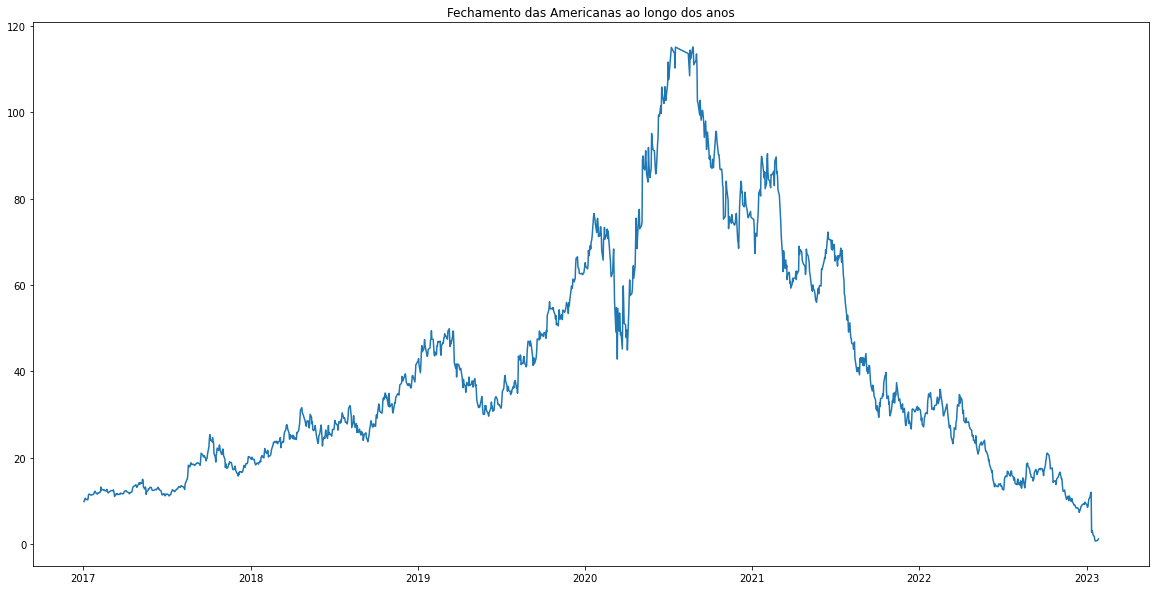

In [ ]:
# Gráfico de fechamento de preços sem outliers

plt.figure(figsize=(20, 10))
plt.plot(amer3_clean['Close'])
plt.title('Fechamento das Americanas ao longo dos anos')
plt.show()

## 4- Criando todos os gráficos

#### A partir daqui, vamos gerar todos os gráficos em formato de velas e com filtros de tempo, simulando uma plataforma de investimentos

In [ ]:
# plotar o gráfico de candlestick

for a in range(len(acoes)):
  stocks = pdr.get_data_yahoo(acoes[a], start=start, end=end)

  trace1 = {
      'x': stocks.index,
      'open': stocks.Open,
      'close': stocks.Close,
      'high': stocks.High,
      'low': stocks.Low,
      'type': 'candlestick',
      'name': acoes[a],
      'showlegend': False
  }
  data = [trace1]
  layout = go.Layout(title=acoes[a])
  fig = go.Figure(data=data, layout=layout)

  #adicionando filtros

  fig.update_xaxes(
      title_text = 'Data',
      rangeslider_visible = True,
      rangeselector = dict(
          buttons = list([
              dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
              dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
              dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
              dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
              dict(step = 'all')])))
  fig.update_yaxes(title_text = 'Preço de Fechamento', tickprefix = '$')
  fig.update_layout(showlegend = False,
      title = {
          'text': f'Preços das Ações da {acoes[a]} (2017-2023)',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'})

  #criando arquivos

  pio.write_html(fig, file=f'figure_{acoes[a].rsplit(".SA")}.html', auto_open=True)
  fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
